In [1]:
import tensorflow as tf

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers
from pandas import Series
import math
import numpy
from tensorflow.keras.layers import *
from tensorflow.keras import layers
import pandas as pd
from math import *
from sklearn.metrics import *

data = pd.read_csv("SeoulBikeData (1).csv",encoding='CP949')

In [2]:
data

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [3]:
sum(data['Rented Bike Count']==0)

295

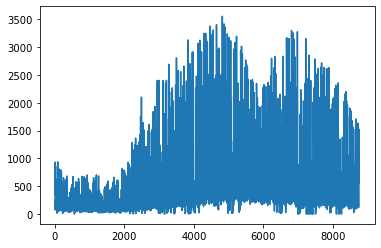

In [4]:
plt.plot(data['Rented Bike Count'])

In [5]:
data['Holiday']=data['Holiday'].factorize()[0]

In [6]:
data['Seasons']=data['Seasons'].factorize()[0]
data['Functioning Day']=data['Functioning Day'].factorize()[0]

In [7]:
data

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,3,0,0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,3,0,0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,3,0,0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,3,0,0


In [8]:
data=data.drop(['Hour'],axis=1)

In [9]:
data

,Date,Rented Bike Count,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0
1,01/12/2017,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0
2,01/12/2017,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0
3,01/12/2017,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0
4,01/12/2017,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,3,0,0
8756,30/11/2018,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,3,0,0
8757,30/11/2018,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,3,0,0
8758,30/11/2018,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,3,0,0


In [10]:
data.columns[1:-3]

Index(['Rented Bike Count', 'Temperature', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [11]:
cols=data.columns[1:-3] 
len(cols)

9

In [12]:
from sklearn.preprocessing import MinMaxScaler
values = data[cols].values.reshape(-1,9)
values = values.astype('float32')
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled=scaler.fit_transform(values)
#scaled = (values-(np.min(values)))/(np.max(values)-(np.min(values)))

In [13]:
values

array([[254. ,  -5.2,  37. , ...,   0. ,   0. ,   0. ],
       [204. ,  -5.5,  38. , ...,   0. ,   0. ,   0. ],
       [173. ,  -6. ,  39. , ...,   0. ,   0. ,   0. ],
       ...,
       [694. ,   2.6,  39. , ...,   0. ,   0. ,   0. ],
       [712. ,   2.1,  41. , ...,   0. ,   0. ,   0. ],
       [584. ,   1.9,  43. , ...,   0. ,   0. ,   0. ]], dtype=float32)

In [14]:
values.shape

(8760, 9)

In [15]:
sum(pd.DataFrame(values)[0]==0)

295

In [16]:
# fill missing values with a value at the same time one day ago
def fill_missing(values):
    one_day = 7 * 24
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if values[row,0]==0:
                values[row,0] = values[row - one_day,0]

In [17]:
fill_missing(values)

In [18]:
sum(pd.DataFrame(values)[0]==0)

0

In [19]:
scaled = (values-(np.min(values)))/(np.max(values)-(np.min(values)))

In [20]:
train_size = int(len(scaled) * 0.80)
val_size = int(len(scaled) * 0.10)

test_size = len(scaled) - train_size-val_size
train,val, test = scaled[0:train_size,:],scaled[train_size:train_size+val_size,:], scaled[train_size+val_size:,:]
print(len(train),len(val), len(test))

7008 876 876


In [21]:
# train data
data[0:train_size]

,Date,Rented Bike Count,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,0,0
1,01/12/2017,204,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,0,0
2,01/12/2017,173,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,0,0
3,01/12/2017,107,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,0,0
4,01/12/2017,78,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,18/09/2018,0,23.2,57,2.2,2000,14.2,0.03,0.0,0.0,3,0,1
7004,18/09/2018,0,22.6,58,1.4,2000,13.9,0.00,0.0,0.0,3,0,1
7005,18/09/2018,0,22.1,61,1.5,2000,14.2,0.00,0.0,0.0,3,0,1
7006,18/09/2018,0,21.8,65,0.3,2000,14.9,0.00,0.0,0.0,3,0,1


In [22]:
# val data
data[train_size:train_size+val_size]

,Date,Rented Bike Count,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
7008,19/09/2018,0,21.0,66,0.4,2000,14.3,0.00,0.0,0.0,3,0,1
7009,19/09/2018,0,20.5,64,0.4,2000,13.4,0.00,0.0,0.0,3,0,1
7010,19/09/2018,0,20.0,70,0.2,2000,14.3,0.00,0.0,0.0,3,0,1
7011,19/09/2018,0,19.7,70,0.5,2000,14.0,0.00,0.0,0.0,3,0,1
7012,19/09/2018,0,19.5,70,0.5,2000,13.8,0.00,0.0,0.0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7879,25/10/2018,1251,7.3,85,1.4,1039,4.9,0.00,0.0,0.0,3,0,0
7880,25/10/2018,2070,7.9,76,1.2,1290,3.9,0.25,0.0,0.0,3,0,0
7881,25/10/2018,1168,10.3,64,1.0,1544,3.7,0.91,0.0,0.0,3,0,0
7882,25/10/2018,779,13.4,53,1.1,1768,4.0,1.53,0.0,0.0,3,0,0


In [23]:
#test data
data[val_size:]

,Date,Rented Bike Count,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
876,06/01/2018,283,0.0,35,2.3,1672,-13.6,1.07,0.0,0.0,0,0,0
877,06/01/2018,356,0.9,28,2.4,1895,-15.6,1.18,0.0,0.0,0,0,0
878,06/01/2018,370,1.8,29,2.0,1693,-14.3,1.14,0.0,0.0,0,0,0
879,06/01/2018,373,2.3,27,2.2,1877,-14.8,0.92,0.0,0.0,0,0,0
880,06/01/2018,352,2.7,27,2.2,1811,-14.4,0.64,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,3,0,0
8756,30/11/2018,764,3.4,37,2.3,2000,-9.9,0.00,0.0,0.0,3,0,0
8757,30/11/2018,694,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,3,0,0
8758,30/11/2018,712,2.1,41,1.0,1859,-9.8,0.00,0.0,0.0,3,0,0


In [24]:
def create_dataset_multistep(dataset, look_back=1,predict=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back-predict):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i+ look_back-1: i+ look_back+predict-1, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [25]:
look_back = 168
predict=24

trainX, trainY = create_dataset_multistep(train, look_back,predict)
valX, valY = create_dataset_multistep(val, look_back,predict)
testX, testY = create_dataset_multistep(test, look_back,predict)


6816
684
684


In [26]:
print(trainX.shape)
print(trainY.shape)

(6816, 168, 9)
(6816, 24)


In [27]:
def gradient_importance(seq, model):

    seq = tf.Variable(seq[np.newaxis,:,:], dtype=tf.float32)

    with tf.GradientTape() as tape:
        predictions = model(seq)

    grads = tape.gradient(predictions, seq)
    grads = tf.reduce_mean(grads, axis=1).numpy()[0]
    
    return grads



def activation_grad(seq, model):
    
    seq = seq[np.newaxis,:,:]
    grad_model = Model([model.inputs], 
                       [model.get_layer('extractor').output, 
                        model.output])

    # Obtain the predicted value and the intermediate filters
    with tf.GradientTape() as tape:
        seq_outputs, predictions = grad_model(seq)

    # Extract filters and gradients
    output = seq_outputs[0]
    grads = tape.gradient(predictions, seq_outputs)[0]

    # Average gradients spatially
    weights = tf.reduce_mean(grads, axis=0)
    
    # Get a ponderated map of filters according to grad importance
    cam = np.ones(output.shape[0], dtype=np.float32)
    for index, w in enumerate(weights):
        cam += w * output[:, index]

    time = int(seq.shape[1]/output.shape[0])
    cam = zoom(cam.numpy(), time, order=1)
    heatmap = (cam - cam.min())/(cam.max() - cam.min())
    
    return heatmap

input이 안맞아서 제외

In [28]:
'''trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1], trainX.shape[2]))
valX = np.reshape(valX, (valX.shape[0],1, valX.shape[1],valX.shape[2]))
testX = np.reshape(testX, (testX.shape[0],1,testX.shape[1], testX.shape[2] ))'''

'trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1], trainX.shape[2]))\nvalX = np.reshape(valX, (valX.shape[0],1, valX.shape[1],valX.shape[2]))\ntestX = np.reshape(testX, (testX.shape[0],1,testX.shape[1], testX.shape[2] ))'

In [29]:
'''trainY=np.reshape(trainY,(trainY.shape[0],trainY.shape[1],1))
valY=np.reshape(valY,(valY.shape[0],valY.shape[1],1))
testY=np.reshape(testY,(testY.shape[0],testY.shape[1],1))'''

'trainY=np.reshape(trainY,(trainY.shape[0],trainY.shape[1],1))\nvalY=np.reshape(valY,(valY.shape[0],valY.shape[1],1))\ntestY=np.reshape(testY,(testY.shape[0],testY.shape[1],1))'

### residual Lstm-CNN

In [30]:
first_input = Input(shape=(168,9))


in0=LSTM(64,return_sequences=True)(first_input)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

ad=add([in0,in1],name='extractor1')

#ad=Dropout(0.5)(ad)
#in0=LSTM(64,return_sequences=True)(ad)
#in1=add([first_input,in0])
in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(ad)
#in1= BatchNormalization(scale=False)(in0)

in1=Conv1D(filters=64, kernel_size=2, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same',name='extractor')(in1)
#in1= BatchNormalization(scale=False)(in1)

ad1=add([in0,in1])


#in0=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(ad1)
#in1= BatchNormalization(scale=False)(in0)

#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([ad1,in1],name='extractor2')
#in0=Conv1D(filters=64, kernel_size=5, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in0)

#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)
#in1= BatchNormalization(scale=False)(in1)
#in1=Conv1D(filters=64, kernel_size=3, activation='relu',padding='same')(in0)

#in1=Conv1D(filters=64, kernel_size=1, activation='relu',padding='same')(in1)
#in1= BatchNormalization(scale=False)(in1)

#in1=add([in0,in1])

#attn_layer = AttentionLayer(name='attention_layer')
#attn_out, attn_states = attn_layer([in1,in1])

    # Concat attention input and LSTM output, in original code it was decoder LSTM
#concat_out = Concatenate(axis=-1, name='concat_layer')([in1, attn_out])
#in1=MaxPooling1D(pool_size=2, name='extractor')(in1)
in1=Flatten()(ad1)
in1=Dropout(0.5)(in1)
#in1=Dense(100, activation='relu')(in1)
out=Dense(24,'relu')(in1)
model=tf.keras.Model(inputs=[first_input],outputs=[out])
model.compile(optimizer='adam', loss='mse')

model.summary()

checkpoint_path = "saved_weights/bike_reslstmcnn_multi.hdf5"
cb = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True,
                                        monitor='val_loss',mode='min',
                                                 verbose=1)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 168, 9)]     0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 168, 64)      18944       input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 168, 64)      12352       lstm[0][0]                       
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 168, 64)      8256        conv1d[0][0]                     
_______________________________________________________________________________________

In [31]:
hist=model.fit(trainX, trainY,validation_data=[valX,valY],epochs=30, verbose=1,callbacks=[cb])

Epoch 1/30
212/213 [============================>.] - ETA: 0s - loss: 0.0156
Epoch 00001: val_loss improved from inf to 0.00000, saving model to saved_weights\bike_reslstmcnn_multi.hdf5
213/213 [==============================] - 11s 53ms/step - loss: 0.0156 - val_loss: 0.0000e+00
Epoch 2/30
212/213 [============================>.] - ETA: 0s - loss: 0.0100
Epoch 00002: val_loss did not improve from 0.00000
213/213 [==============================] - 11s 52ms/step - loss: 0.0100 - val_loss: 0.0000e+00
Epoch 3/30
212/213 [============================>.] - ETA: 0s - loss: 0.0084
Epoch 00003: val_loss did not improve from 0.00000
213/213 [==============================] - 11s 51ms/step - loss: 0.0084 - val_loss: 0.0000e+00
Epoch 4/30
213/213 [==============================] - ETA: 0s - loss: 0.0076
Epoch 00004: val_loss did not improve from 0.00000
213/213 [==============================] - 11s 50ms/step - loss: 0.0076 - val_loss: 0.0000e+00
Epoch 5/30
213/213 [==============================

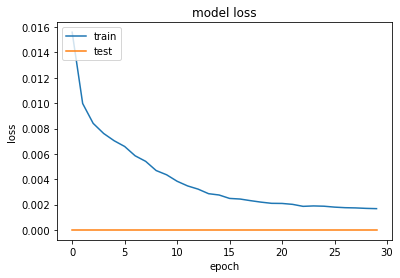

In [32]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()